In [14]:
# importing the necessary functions and layers

from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras import Model

In [2]:
image_input = Input(shape=(224,224,3))

In [3]:
# first convolution block
x = Conv2D(filters=64,kernel_size=3,padding='same',activation='relu')(image_input)
x = Conv2D(filters=64,kernel_size=3,padding='same',activation='relu')(x)
x = MaxPool2D(pool_size=2,strides=2,padding='same')(x)


In [4]:
# second convolution block
x = Conv2D(filters=128,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(filters=128,kernel_size=3,padding='same',activation='relu')(x)
x = MaxPool2D(pool_size=2,strides=2,padding='same')(x)

In [5]:
# third convolution block
x = Conv2D(filters=256,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(filters=256,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(filters=256,kernel_size=3,padding='same',activation='relu')(x)
x = MaxPool2D(pool_size=2,strides=2,padding='same')(x)

In [6]:
# fourth convolution block
x = Conv2D(filters=512,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(filters=512,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(filters=512,kernel_size=3,padding='same',activation='relu')(x)
x = MaxPool2D(pool_size=2,strides=2,padding='same')(x)

In [7]:
# fifth convolution block
x = Conv2D(filters=512,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(filters=512,kernel_size=3,padding='same',activation='relu')(x)
x = Conv2D(filters=512,kernel_size=3,padding='same',activation='relu')(x)
x = MaxPool2D(pool_size=2,strides=2,padding='same')(x)

In [8]:
# fully connected layers
x = Flatten()(x)
x = Dense(units=4096, activation='relu')(x)
x = Dense(units=4096, activation='relu')(x)
output = Dense(units=1000, activation='softmax')(x)


In [9]:
# creating the model
model = Model(inputs=image_input, outputs = output)


In [10]:
# reviewing the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0     

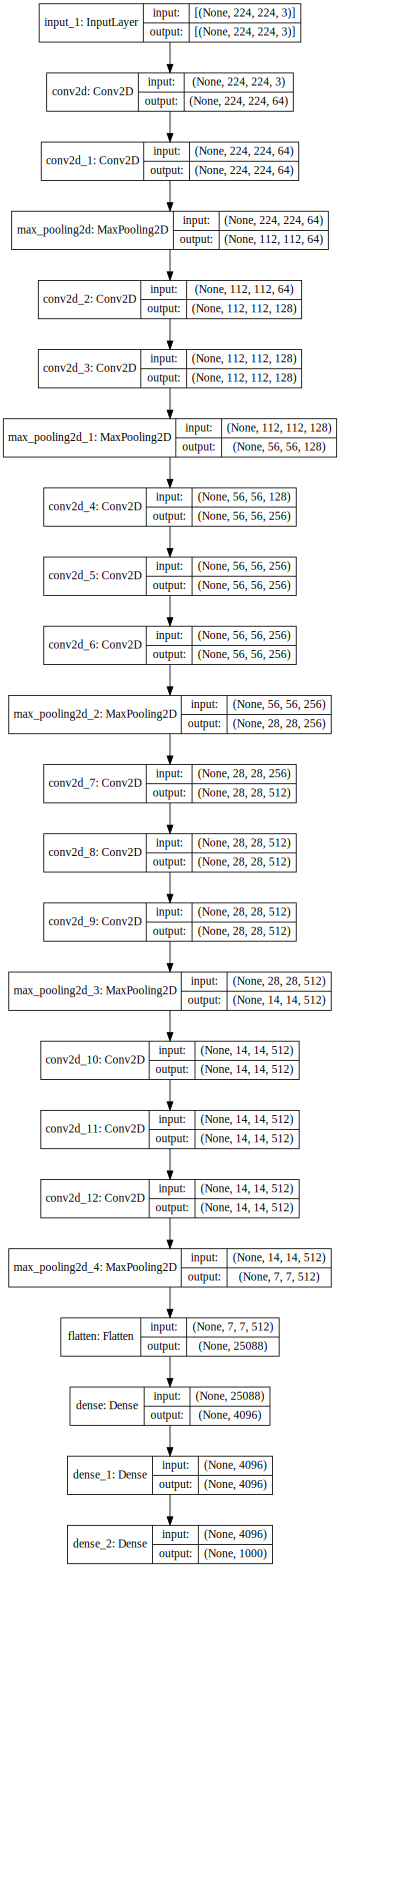

In [11]:
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import pydot
import graphviz

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, rankdir='TB',expand_nested=False, dpi=60, subgraph=False).create(prog='dot',format='svg'))